In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import string
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('preprocessed_aspected.csv')

In [3]:
X = df['text']
y = df ['airline_sentiment']

In [4]:

cv=CountVectorizer(max_features=5000,stop_words=['virginamerica','united', 'southwestair', 'jetblue', 'usairways', 'americanair'])
X_fin=cv.fit_transform(X).toarray()

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X_fin,y,test_size=0.2)

## Using Multinomial Naive Bayes

In [6]:

model=MultinomialNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import classification_report
cf=classification_report(y_test,y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1846
           1       0.61      0.47      0.53       606
           2       0.68      0.66      0.67       429

    accuracy                           0.76      2881
   macro avg       0.70      0.67      0.68      2881
weighted avg       0.75      0.76      0.76      2881



## Using Multilayer perceptron classifier

In [7]:
from sklearn.neural_network import MLPClassifier

In [8]:
MLP = MLPClassifier()
MLP.fit(X_train, y_train)
predictions = MLP.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1846
           1       0.52      0.54      0.53       606
           2       0.58      0.64      0.61       429

    accuracy                           0.73      2881
   macro avg       0.65      0.66      0.65      2881
weighted avg       0.74      0.73      0.73      2881



## Using XGBoost Classifier

In [9]:
from xgboost import XGBClassifier

In [10]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1846
           1       0.70      0.32      0.44       606
           2       0.71      0.63      0.67       429

    accuracy                           0.76      2881
   macro avg       0.73      0.63      0.65      2881
weighted avg       0.75      0.76      0.74      2881



## Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1846
           1       0.61      0.52      0.56       606
           2       0.69      0.63      0.66       429

    accuracy                           0.77      2881
   macro avg       0.71      0.68      0.69      2881
weighted avg       0.76      0.77      0.76      2881



## SVM Classifier

In [13]:
from sklearn import svm

In [14]:
svm_clf = svm.SVC()

svm_clf.fit(X_train, y_train)
predictions = svm_clf.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1846
           1       0.65      0.50      0.56       606
           2       0.77      0.60      0.68       429

    accuracy                           0.78      2881
   macro avg       0.74      0.67      0.70      2881
weighted avg       0.77      0.78      0.77      2881



SVM gives the best accuracy of about 79%

## Aspect Insights

In [15]:
from wordcloud import WordCloud


In [16]:
Negative_sentiment_rows = df[df['airline_sentiment'] == 0]
Neutral_sentiment_rows = df[df['airline_sentiment'] == 1]
Positive_sentiment_rows = df[df['airline_sentiment'] == 2]

In [17]:
Negative_sentiment_rows = Negative_sentiment_rows.reset_index(drop=True)
Neutral_sentiment_rows = Neutral_sentiment_rows.reset_index(drop=True)
Positive_sentiment_rows = Positive_sentiment_rows.reset_index(drop=True)

## Negative 

In [18]:
punctuation = string.punctuation
import regex as re

In [19]:
Negative_words = []
for row in Negative_sentiment_rows['aspects']:
    row=re.sub('[^a-zA-Z]',' ',row)
    row=row.lower().split()
    row = [x for x in row if (x not in punctuation)]
    for word in row:
        Negative_words.append(word)

In [20]:
NegWords = defaultdict(lambda: 0)
for k in Negative_words:
 NegWords[k] += 1;

In [21]:
c = Counter(Negative_words)
c.most_common(12)

[('staff', 6941),
 ('punctuality', 6693),
 ('price', 4435),
 ('service', 3021),
 ('comfort', 2405),
 ('cleanliness', 2376),
 ('safety', 632),
 ('seat', 442),
 ('entertainment', 137),
 ('boarding', 97),
 ('food', 90),
 ('baggage', 76)]

(-0.5, 399.5, 199.5, -0.5)

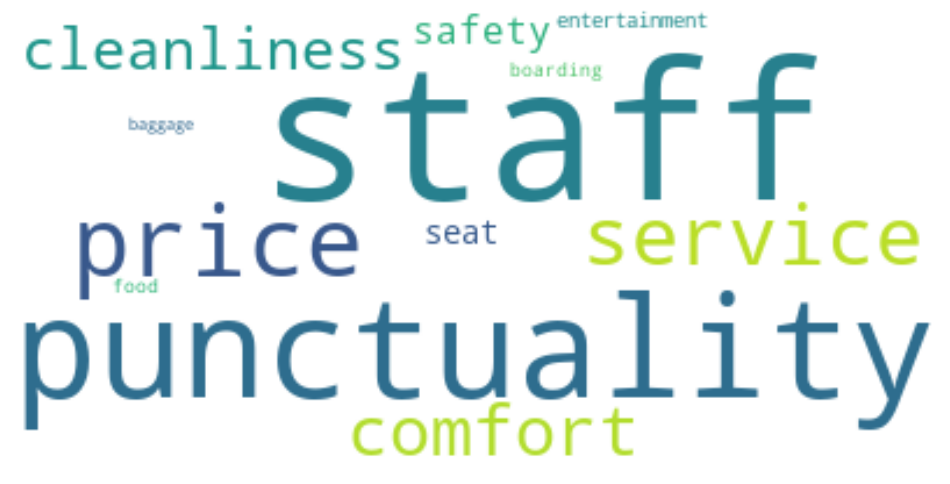

In [22]:
wc = WordCloud(background_color="white", max_words=50)
wc.generate_from_frequencies(NegWords)
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

## Postive

In [23]:
Positive_words = []
for row in Positive_sentiment_rows['aspects']:
    row=re.sub('[^a-zA-Z]',' ',row)
    row=row.lower().split()
    row = [x for x in row if (x not in punctuation)]
    for word in row:
        Positive_words.append(word)

In [24]:
PosWords = defaultdict(lambda: 0)
for k in Positive_words:
 PosWords[k] += 1;

c = Counter(Positive_words)
c.most_common(12)

[('staff', 2159),
 ('service', 1527),
 ('comfort', 1142),
 ('punctuality', 681),
 ('price', 424),
 ('safety', 332),
 ('cleanliness', 192),
 ('entertainment', 131),
 ('boarding', 83),
 ('baggage', 79),
 ('food', 68),
 ('seat', 58)]

(-0.5, 399.5, 199.5, -0.5)

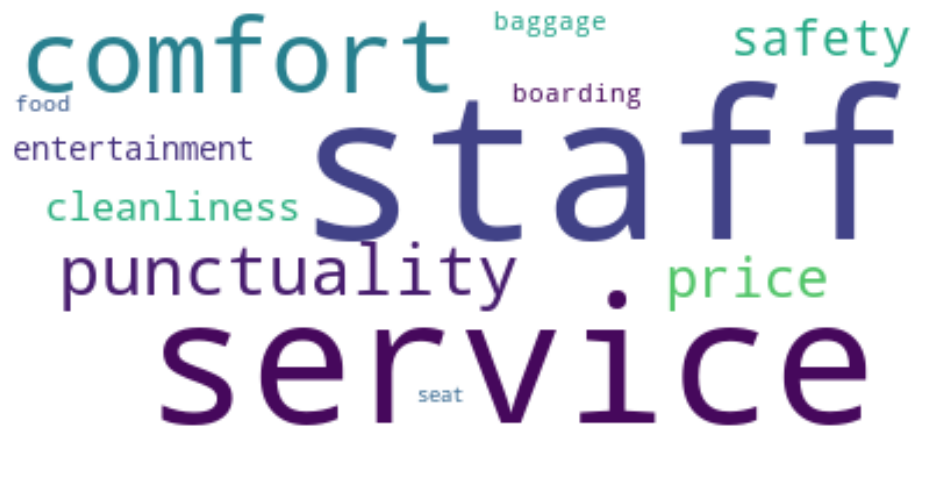

In [25]:
wc = WordCloud(background_color="white", max_words=50)
wc.generate_from_frequencies(PosWords)
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

## Neutral

In [26]:
Neutral_words = []
for row in Neutral_sentiment_rows['aspects']:
    row=re.sub('[^a-zA-Z]',' ',row)
    row=row.lower().split()
    row = [x for x in row if (x not in punctuation)]
    for word in row:
        Neutral_words.append(word)

In [27]:
NetWords = defaultdict(lambda: 0)
for k in Positive_words:
 NetWords[k] += 1;

c = Counter(Neutral_words)
c.most_common(12)

[('staff', 2459),
 ('comfort', 1712),
 ('punctuality', 1464),
 ('cleanliness', 1023),
 ('service', 979),
 ('price', 836),
 ('safety', 313),
 ('entertainment', 76),
 ('seat', 56),
 ('food', 25),
 ('baggage', 24),
 ('boarding', 24)]

(-0.5, 399.5, 199.5, -0.5)

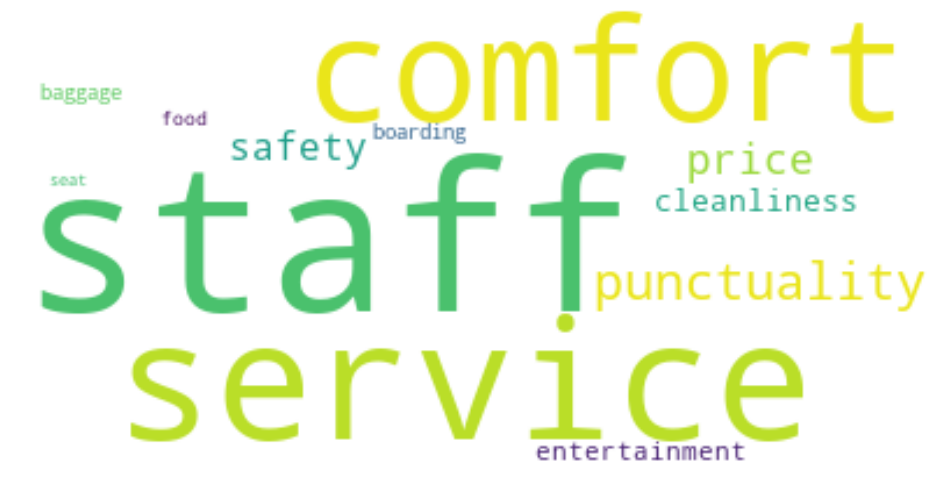

In [28]:
wc = WordCloud(background_color="white", max_words=50)
wc.generate_from_frequencies(NetWords)
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

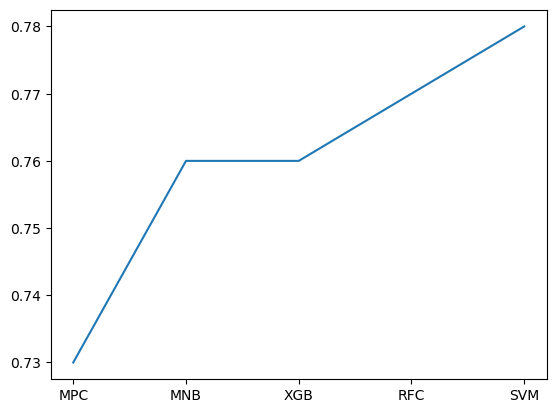

In [42]:
result_dict = {"MPC":0.73, "MNB": 0.76, "XGB":0.76,"RFC":0.77, "SVM":0.78}

result_dict.keys()

import matplotlib.pylab as plt

names = list(result_dict.keys())
values = list(result_dict.values())

plt.plot(names, values)
plt.show()